# Chaotic Pendulum

## The Idea
This was developed as a final project for PHY2200.

The concept for this project came from a video (https://www.youtube.com/watch?v=C5Jkgvw-Z6E) briefly discussing chaotic systems. In the video, a mass hangs from a string with three magnets spaced in an equilateral triangle on the surface of a table with the triangle's center where the pendulum would be at rest. Ultimately, we want to determine which magnet the mass will come to rest. The most reasonable way to do this is to let a computer solve the system given different initial starting positions and coloring the start position by the color of the magnet.

Here, I wish to not only model that system but model similar systems with a different number of attractors.

### Mathematical Description
The system is incredibly complex by its setup: a mass swings from a pendulum under the force of gravity in 3-dimensional space, but also is acted upon by some number of attractive forces on a plane stationed below the pivot of the pendulum at a height that is the same as the length of the pendulum's string. This gets absurd very quickly, specifically because of the stationing of the attractor points. In fact, it is difficult to structure this problem in terms of forces and as a result we will use Lagrangian Mechanics to help develop a system of equations.

Because we are dealing with a pendulum, the best coordinate system would be spherical coordinates. We encounter a very small problem related to orientation. It is best to describe a pendulum's initial angle as the angle the string makes with a line from the pendulum's pivot in the direction of the gravitational field, and unfortunately with how spherical coordinates are defined we are left with two choices. Either we redefine a new coordinate system similar to spherical, or we simply reflect the system about the x-y plane. This means that, as weird as it seems, gravity will be pointing in the positive z direction. This comes with a variety of consequences that we will outline.

The length of the pendulum's string is $L$, the $i$th attractor is at coordinates $(x,y,z) = (x_i, y_i, z_i)$ and has strength $A_i$, and the mass at the end of the pendulum is $m$.

#### Redefining the gravitational potential energy
Since gravity points up, we may say the force of gravity is $\vec{F_g} = mg\hat{z}$. Since the system is flipped about the x-y plane, we may take the reference point $z = L$ to mean that $U_g = 0$, and $z<L$ to be where $U_g > 0$.
We know that $$U_g = -\int_{ref}^{P} \vec{F} \cdot \vec{dr}$$ and using what we have so far we may establish that $$U_g = - \int_{L}^{z} mg\hat{z} \cdot dz\hat{z} = - mg\int_{L}^{z}dz = -mg(z - L) = mg(L - z)$$

Furthermore, we are working in spherical coordinates defined by:$$x = r\cos{\phi}\sin{\theta}$$ $$y = r\sin{\phi}\sin{\theta}$$ $$z = r\cos{\theta}$$
and substituting $z = r\cos{\theta}$, we get that $U_g(r, \theta) = mg(L - r\cos{\theta})$. We know that since the mass is confined to being on a sphere of radius $L$, we find that the gravitational potential acting on the mass is $$U_g(\theta) = mgL(1-\cos{\theta})$$

#### Potential from the attractors
The force generated by each attractor is $\vec{F_i} = \frac{A_i}{s_i ^2}\hat{s_i}$. If $A_i$ is positive, then the force is repulsive. Likewise, if $A_i$ is negative, then the force is attractive. The potential from these is as follows:
$$U_i = -\int_{\infty}^{s_i} \frac{A_i}{s_i ^2}\hat{s_i} \cdot ds_i\hat{s_i}$$

$$U_i = -A_i\int_{\infty}^{s_i}\frac{ds_i}{s_i ^2}$$

$$U_i = \frac{A_i}{s_i}$$

Here, $s_i$ represents the distance the attractor is from the mass.

Subsequently, $s_i$ may be written as:
$$s_i = \sqrt{(L\cos{\phi}\sin{\theta} - x_i)^2 + (L\sin{\phi}\sin{\theta} - y_i)^2 +(L\cos{\theta} - z_i)^2}$$

And so
$$U_i = \frac{A_i}{\sqrt{(L\cos{\phi}\sin{\theta} - x_i)^2 + (L\sin{\phi}\sin{\theta} - y_i)^2 +(L\cos{\theta} - z_i)^2}}$$

#### Partial Derivatives of the Potential
Given $U_i$, and recognizing that later we will need to use these expressions while taking the Lagrangian derivation route, we get that:
$$\frac{\partial U_i}{\partial \theta} = \frac{-A_i\Big( (L\cos{\phi}\sin{\theta} - x_i)(L\cos{\phi}\cos{\theta}) + (L\sin{\phi}\sin{\theta} - y_i)(L\sin{\phi}\cos{\theta}) + (L\cos{\theta}-z_i)(-L\sin{\theta})\Big)}{\Big((L\cos{\phi}\sin{\theta} - x_i)^2 + (L\sin{\phi}\sin{\theta} - y_i)^2 +(L\cos{\theta} - z_i)^2 \Big)^{3/2}}$$

$$\frac{\partial U_i}{\partial \phi} = \frac{-A_i\Big( (L\cos{\phi}\sin{\theta} - x_i)(-L\sin{\phi}\sin{\theta}) + (L\sin{\phi}\sin{\theta} - y_i)(L\cos{\phi}\sin{\theta})\Big)}{\Big((L\cos{\phi}\sin{\theta} - x_i)^2 + (L\sin{\phi}\sin{\theta} - y_i)^2 +(L\cos{\theta} - z_i)^2 \Big)^{3/2}}$$


#### Kinetic Energy
Since we're dealing in spherical coordinates, let's get a handle on what the kinetic energy is within this coordinate system. $K = \frac{1}{2}m\vec{v}\cdot\vec{v}$, and in spherical coordinates we have that $\vec{v} = \dot{r}\hat{r} + r\dot{\theta}\hat{\theta} + r\dot{\phi}\sin{\theta}\hat{\phi}$. Then $\vec{v}\cdot\vec{v} = \dot{r}^2 + r^2 \dot{\theta}^2 + r^2 \dot{\phi}^2\sin^2{\theta}$.

Since the mass is again confined by radius $L$, the kinetic energy of the mass is $K = \frac{1}{2}mL^2 \big(\dot{\theta}^2 + \dot{\phi}^2\sin^2{\theta}\big)$

#### Lagrangian Mechanics
The Lagrangian, $\mathcal{L}$, is the difference in kinetic energy and potential energy, or mathematically, $\mathcal{L} = K - U$. Once a Lagrangian is found, one may find equations of motion for the system through:
$$\frac{d}{dt}\Big(\frac{\partial \mathcal{L}}{\partial \dot{q}} \Big) = \frac{\partial \mathcal{L}}{\partial q}$$
for any time-dependent variable q in the system.

Since we now know the kinetic energy and the potential wells in the system, we may construct a Lagrangian.
$$\mathcal{L} = K - U = K - U_g - \sum_{i=0}^{N-1}U_i$$
$$\mathcal{L} = \frac{1}{2}mL^2 \big(\dot{\theta}^2 + \dot{\phi}^2\sin^2{\theta}\big) - mgL\big(1 - \cos{\theta}\big) - \sum_{i=0}^{N-1} \frac{A_i}{\sqrt{(L\cos{\phi}\sin{\theta} - x_i)^2 + (L\sin{\phi}\sin{\theta} - y_i)^2 +(L\cos{\theta} - z_i)^2}}$$

#### System of Equations
Let's start off by addressing that this calculation was tedious, and the resulting equations are dauntingly long.
Starting with the easiest parts to determine:
$$\frac{d}{dt}\Big(\frac{\partial \mathcal{L}}{\partial \dot{\theta}} \Big) = \frac{d}{dt}\Big(mL^2 \dot{\theta} \Big) = mL^2 \ddot{\theta}$$
$$\frac{d}{dt}\Big(\frac{\partial \mathcal{L}}{\partial \dot{\phi}} \Big) = \frac{d}{dt}\Big(mL^2 \dot{\phi}\sin^2{\theta} \Big) = mL^2 \Big(\ddot{\phi}\sin^2{\theta} + \dot{\phi}\dot{\theta}\sin{\theta}\cos{\theta} \Big)$$

Now, for the more complicated components:
$$\frac{\partial \mathcal{L}}{\partial \theta} = \frac{1}{2}mL^2\dot{\phi}^2 \frac{\partial}{\partial \theta}\big(\sin^2{\theta}\big) - mgL\sin{\theta} - \sum_{i=0}^{N-1}\frac{\partial U_i}{\partial \theta}$$

$$ = mL^2\dot{\phi}^2 \sin{\theta}\cos{\theta} - mgL\sin{\theta} - \sum_{i=0}^{N-1}\frac{-A_i\Big( (L\cos{\phi}\sin{\theta} - x_i)(L\cos{\phi}\cos{\theta}) + (L\sin{\phi}\sin{\theta} - y_i)(L\sin{\phi}\cos{\theta}) + (L\cos{\theta}-z_i)(-L\sin{\theta})\Big)}{\Big((L\cos{\phi}\sin{\theta} - x_i)^2 + (L\sin{\phi}\sin{\theta} - y_i)^2 +(L\cos{\theta} - z_i)^2 \Big)^{3/2}}$$



$$\frac{\partial \mathcal{L}}{\partial \phi} = - \sum_{i=0}^{N-1}\frac{\partial U_i}{\partial \phi}$$

$$ = -\sum_{i=0}^{N-1} \frac{-A_i\Big( (L\cos{\phi}\sin{\theta} - x_i)(-L\sin{\phi}\sin{\theta}) + (L\sin{\phi}\sin{\theta} - y_i)(L\cos{\phi}\sin{\theta})\Big)}{\Big((L\cos{\phi}\sin{\theta} - x_i)^2 + (L\sin{\phi}\sin{\theta} - y_i)^2 +(L\cos{\theta} - z_i)^2 \Big)^{3/2}}$$


Finally, equating the appropriate sides:
$$mL^2 \Big(\ddot{\phi}\sin^2{\theta} + \dot{\phi}\dot{\theta}\sin{\theta}\cos{\theta} \Big) = \sum_{i=0}^{N-1}\frac{A_i\Big( (L\cos{\phi}\sin{\theta} - x_i)(-L\sin{\phi}\sin{\theta}) + (L\sin{\phi}\sin{\theta} - y_i)(L\cos{\phi}\sin{\theta})\Big)}{\Big((L\cos{\phi}\sin{\theta} - x_i)^2 + (L\sin{\phi}\sin{\theta} - y_i)^2 +(L\cos{\theta} - z_i)^2 \Big)^{3/2}}$$
and
$$mL^2 \ddot{\theta} = mL^2\dot{\phi}^2 \sin{\theta}\cos{\theta} - mgL\sin{\theta} + \sum_{i=0}^{N-1}\frac{A_i\Big( (L\cos{\phi}\sin{\theta} - x_i)(L\cos{\phi}\cos{\theta}) + (L\sin{\phi}\sin{\theta} - y_i)(L\sin{\phi}\cos{\theta}) + (L\cos{\theta}-z_i)(-L\sin{\theta})\Big)}{\Big((L\cos{\phi}\sin{\theta} - x_i)^2 + (L\sin{\phi}\sin{\theta} - y_i)^2 +(L\cos{\theta} - z_i)^2 \Big)^{3/2}}$$

The summation, as one may notice, goes from $0$ to $N-1$ rather than going from $1$ to $N$. This is just convention for ease of translating it into code.

We may actually modify the equations further to get them into a form that will be coded. For theta, we have:
$$\dot{\theta} = \frac{d\theta}{dt} = \omega_\theta$$
$$\frac{d\dot{\theta}}{dt} = \frac{d\omega_\theta}{dt} = \dot{\phi}^2\sin{\theta}\cos{\theta} - \frac{g}{L}\sin{\theta} + \frac{1}{mL^2}\sum_{i=0}^{N-1} C_i(\theta, \phi)\Big((L\cos{\phi}\sin{\theta} - x_i)(L\cos{\phi}\cos{\theta}) + (L\sin{\phi}\sin{\theta} - y_i)(L\sin{\phi}\cos{\theta}) + (L\cos{\theta}-z_i)(-L\sin{\theta})\Big)$$
and likewise for phi:
$$\dot{\phi} = \frac{d\phi}{dt} = \omega_\phi$$
$$\frac{d\dot{\phi}}{dt}= \frac{d\omega_\phi}{dt} = -2\dot{\phi}\dot{\theta}\cot{\theta} + \frac{\csc^2{\theta}}{mL^2}\sum_{i=0}^{N-1}C_i(\theta,\phi)\Big((L\cos{\phi}\sin{\theta} - x_i)(-L\sin{\phi}\sin{\theta}) + (L\sin{\phi}\sin{\theta} - y_i)(L\cos{\phi}\sin{\theta})\Big)$$

As a shorthand, $C_i(\theta,\phi) = \frac{A_i}{\Big((L\cos{\phi}\sin{\theta} - x_i)^2 + (L\sin{\phi}\sin{\theta} - y_i)^2 +(L\cos{\theta} - z_i)^2 \Big)^{3/2}}$.

#### Adding a Dampening Force
We aren't totally done yet. The Lagrangian approach leaves us with one little issue: energy is conserved and as a result it is incredibly difficult for the pendulum to ever settle near an attractor. As a result, we will artificially add a dampening force, $\vec{F_d}$, which is proportional to velocity squared by the coefficient $\beta$.
$$\vec{F_d} = -m\beta v^2 \hat{v} = -m\beta v^2 \frac{\vec{v}}{v}= -m\beta v \vec{v} = -m\beta L\sqrt{\dot{\theta}^2 + \dot{\phi}^2 \sin^2{\theta}}\Big(L\dot{\theta}\hat{\theta} + L\dot{\phi}\sin{\theta}\hat{\phi} \Big) $$
Recognizing that the equations given to us by the Lagrangian are essentially force equations in the $\hat{\theta}$ and $\hat{\phi}$ directions. As a result we may add the drag terms to the respective equations.

$$\dot{\theta} = \frac{d\theta}{dt} = \omega_\theta$$
$$\frac{d\dot{\theta}}{dt} = \frac{d\omega_\theta}{dt} = -\beta L^2\dot{\theta}\sqrt{\dot{\theta}^2 + \dot{\phi}^2 \sin^2{\theta}} + \dot{\phi}^2\sin{\theta}\cos{\theta} - \frac{g}{L}\sin{\theta} + \frac{1}{mL^2}\sum_{i=0}^{N-1} C_i(\theta, \phi)\Big((L\cos{\phi}\sin{\theta} - x_i)(L\cos{\phi}\cos{\theta}) + (L\sin{\phi}\sin{\theta} - y_i)(L\sin{\phi}\cos{\theta}) + (L\cos{\theta}-z_i)(-L\sin{\theta})\Big)$$
and likewise for phi:
$$\dot{\phi} = \frac{d\phi}{dt} = \omega_\phi$$
$$\frac{d\dot{\phi}}{dt}= \frac{d\omega_\phi}{dt} = -\beta L^2 \dot{\phi}\sin{\theta}\sqrt{\dot{\theta}^2 + \dot{\phi}^2 \sin^2{\theta}} -2\dot{\phi}\dot{\theta}\cot{\theta} + \frac{\csc^2{\theta}}{mL^2}\sum_{i=0}^{N-1}C_i(\theta,\phi)\Big((L\cos{\phi}\sin{\theta} - x_i)(-L\sin{\phi}\sin{\theta}) + (L\sin{\phi}\sin{\theta} - y_i)(L\cos{\phi}\sin{\theta})\Big)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import ode
## the packages below are used to create an animation as a mp4 file and display it in the notebook
from IPython.display import HTML
from mplEasyAnimate import animation
from tqdm import tqdm
from base64 import b64encode

from numba import jit

In [2]:
%matplotlib notebook

All the units we will deal with are SI units, and we will deal with systems that are arranged in a regular N-gon. In other words, given a distance from the z-axis and the number of attractors we wish to have, we may find the positions of each attractor.

In [3]:
#shorthand pi
pi = np.pi
#default values
N = 3
L = 20
R = 5
m = 50e-3
g = 9.81
α = -10 #Recall, a negative number means these will attract rather than repel.
β = 0.001
θ0 = pi/2
ϕ0 = pi/4
ωθ0 = 0
ωϕ0 = 0
tend = 30
dt = 0.001

In [5]:
# N = 3
xi = np.zeros(N)
yi = np.zeros(N)
θi = np.zeros(N)
ϕi = np.zeros(N)
Ai = np.zeros(N)
zi = np.zeros(N)

def attractorset(L,R,N,α):
    global xi, yi, θi, ϕi, Ai, zi
    xi = np.zeros(N)
    yi = np.zeros(N)
    θi = np.zeros(N)
    ϕi = np.zeros(N)
    Ai = np.ones(N)*α # this makes the Ai coefficients α (N/m^2) (strength of attractors)
    zi = np.ones(N)*L

    for i in range(0, N):
        ϕi[i] = (2*pi*i)/N #(2*pi*i + pi/N)/N #this commented out version might be handy for later.
        xi[i] = R*np.cos(ϕi[i])
        yi[i] = R*np.sin(ϕi[i])
        θi[i] = np.arctan2(R,L)
    return L, Ai, xi, yi, ϕi, θi, zi

def coef(L, thisAi, thisxi, thisyi, thiszi, ϕ, θ): #This computes C_i(θ, ϕ)
    coef = thisAi/(((L*np.cos(ϕ)*np.sin(θ) - thisxi)**2 + (L*np.sin(ϕ)*np.sin(θ) - thisyi)**2 + (L*np.cos(θ) - thiszi)**2)**(3/2))
    return coef

def psum(θ,ϕ): #given mass location, computes the sum in the \ddot{phi} equation.
    w = np.zeros(N)
    for i in range(0,N):
        c = coef(L, Ai[i], xi[i], yi[i], zi[i], ϕ, θ)
        w[i] = c*((L*np.cos(ϕ)*np.sin(θ) - xi[i])*(-L*np.sin(ϕ)*np.sin(θ)) + (L*np.sin(ϕ)*np.sin(θ) - yi[i])*(L*np.cos(ϕ)*np.sin(θ)))
    wsum = sum(w)
    return wsum

def tsum(θ,ϕ): #given mass location, computes the sum in the \ddot{theta} equation.
    w = np.zeros(N)
    for i in range(0,N):
        c = coef(L, Ai[i], xi[i], yi[i], zi[i], ϕ, θ)
        w[i] = c*((L*np.cos(ϕ)*np.sin(θ) - xi[i])*(L*np.cos(ϕ)*np.cos(θ)) + (L*np.sin(ϕ)*np.sin(θ) - yi[i])*(L*np.sin(ϕ)*np.cos(θ)) + (L*np.cos(θ) - zi[i])*(-L*np.sin(θ)))
    wsum = sum(w)
    return wsum

#--------------------------------------------------System without drag-------------------------------------------------------
def ODESystem(data, time):
    θ = data[0]
    ωθ = data[1]
    ϕ = data[2]
    ωϕ = data[3]
    dωθdt = (ωϕ**2)*np.sin(θ)*np.cos(θ) - (g/L)*np.sin(θ) + (1/(m * L**2))*tsum(θ,ϕ) #- β*(ωθ**2 + (ωϕ**2)*(np.sin(θ)**2))*(L**2)
    dωϕdt = -2*ωϕ*ωθ*(np.cos(θ)/np.sin(θ)) + (1/(m * L**2 * np.sin(θ)**2))*psum(θ,ϕ) #- β*(ωθ**2 + (ωϕ**2)*(np.sin(θ)**2))*(L**2)
    
    return np.array([ωθ, dωθdt, ωϕ, dωϕdt])

def RunODES(Number, Length, Radius, strength, θ0, ϕ0, ωθ0, ωϕ0, tend, dt):
    global Num, Len, Ai, xi, yi, ϕi, θi, zi
    Num = Number
    Len = attractorset(Length,Radius,Number,strength)[0]
    Ai = attractorset(Length,Radius,Number,strength)[1]
    xi = attractorset(Length,Radius,Number,strength)[2]
    yi = attractorset(Length,Radius,Number,strength)[3]
    ϕi = attractorset(Length,Radius,Number,strength)[4]
    θi = attractorset(Length,Radius,Number,strength)[5]
    zi = attractorset(Length,Radius,Number,strength)[6]
    
    t = 0.0
    
    data = np.array([θ0, ωθ0, ϕ0, ωϕ0])
    tdata = []
    θdata = []
    ωθdata = []
    ϕdata = []
    ωϕdata = []
    
    tdata.append(t)
    θdata.append(θ0)
    ωθdata.append(ωθ0)
    ϕdata.append(ϕ0)
    ωϕdata.append(ωϕ0)
    
    while t<tend:
        data = ode.RK4n(ODESystem, data, t, dt)        
        t = t+dt
        
        if data[0] > pi:
            data[0] = 2*pi - data[0]
        elif data[0] < -pi:
            data[0] = 2*pi + data[0]
        
        if data[2] > 2*pi:
            data[2] = data[2] - 2*pi
        elif data[2] < 0:
            data[2] = data[2] + 2*pi
        
        tdata.append(t)
        θdata.append(data[0])
        ωθdata.append(data[1])
        ϕdata.append(data[2])
        ωϕdata.append(data[3])
    return np.array(tdata), np.array(θdata), np.array(ωθdata), np.array(ϕdata), np.array(ωϕdata)
#----------------------------------------------------------------------------------------------------------------------


#--------------------------------------------------System with drag-------------------------------------------------------
def ODESystemD(data, time):
    θ = data[0]
    ωθ = data[1]
    ϕ = data[2]
    ωϕ = data[3]
    dωθdt = (ωϕ**2)*np.sin(θ)*np.cos(θ) - (g/L)*np.sin(θ) + (1/(m * L**2))*tsum(θ,ϕ) - β*(L**2)*np.sqrt(ωθ**2 + (ωϕ**2)*(np.sin(θ)**2))*ωθ
    dωϕdt = -2*ωϕ*ωθ*(np.cos(θ)/np.sin(θ)) + (1/(m * L**2 * np.sin(θ)**2))*psum(θ,ϕ) - β*(L**2)*np.sqrt(ωθ**2 + (ωϕ**2)*(np.sin(θ)**2))*ωϕ*np.sin(θ)
    
    return np.array([ωθ, dωθdt, ωϕ, dωϕdt])

def RunODESD(Number, Length, Radius, strength, drag, θ0, ϕ0, ωθ0, ωϕ0, tend, dt):
    global Num, Len, Ai, xi, yi, ϕi, θi, zi
    Num = Number
    Len = attractorset(Length,Radius,Number,strength)[0]
    Ai = attractorset(Length,Radius,Number,strength)[1]
    xi = attractorset(Length,Radius,Number,strength)[2]
    yi = attractorset(Length,Radius,Number,strength)[3]
    ϕi = attractorset(Length,Radius,Number,strength)[4]
    θi = attractorset(Length,Radius,Number,strength)[5]
    zi = attractorset(Length,Radius,Number,strength)[6]
    
    t = 0.0
    
    data = np.array([θ0, ωθ0, ϕ0, ωϕ0])
    tdata = []
    θdata = []
    ωθdata = []
    ϕdata = []
    ωϕdata = []
    
    tdata.append(t)
    θdata.append(θ0)
    ωθdata.append(ωθ0)
    ϕdata.append(ϕ0)
    ωϕdata.append(ωϕ0)
    
    while t<tend:
        data = ode.RK4n(ODESystemD, data, t, dt)        
        t = t+dt
        
        if data[0] > pi:
            data[0] = 2*pi - data[0]
        elif data[0] < -pi:
            data[0] = 2*pi + data[0]
        
        if data[2] > 2*pi:
            data[2] = data[2] - 2*pi
        elif data[2] < 0:
            data[2] = data[2] + 2*pi
        
        tdata.append(t)
        θdata.append(data[0])
        ωθdata.append(data[1])
        ϕdata.append(data[2])
        ωϕdata.append(data[3])
    return np.array(tdata), np.array(θdata), np.array(ωθdata), np.array(ϕdata), np.array(ωϕdata)
#----------------------------------------------------------------------------------------------------------------------



#----------------------------------------------Plot the attractors in the animations-----------------------------------
def Atplotxy(xi, yi):
    pop = int(255/N)
    for i in range(0,N):
        plt.plot(xi[i], yi[i], color = plt.get_cmap('hsv')(pop*i), marker = '.')
    return

def Atplotxz(xi, zi):
    pop = int(255/N)
    zat = -zi
    for i in range(0,N):
        plt.plot(xi[i], zat[i], color = plt.get_cmap('hsv')(pop*i), marker = '.')
    return
#----------------------------------------------------------------------------------------------------------------------

#-------------------------Animating xy, xz, and yz projections for the trajectory of the pendulum.---------------------
def animxy(filename, skip):
    Nit = int(tend/dt)
    with animation(filename, dpi=30) as anim:
        t_offsets = np.arange(Nit+1)
        i = 0
        for offset in tqdm(t_offsets):
            if i%skip == 0:
                fig = plt.figure(dpi=100)
                plt.plot(xdata[0:i], ydata[0:i], 'k-', linewidth=0.5, label='x-y projection')
                plt.grid()
                Atplotxy(xi,yi)

                plt.xlim(-1.25*L,1.25*L)
                plt.ylim(-1.25*L,1.25*L)
                plt.xlabel('x (m)')
                plt.ylabel('y (m)')
                plt.legend(loc='best')
                anim.add_frame(fig)
                plt.close(fig)
            i = i+1
    return

def animxz(filename, skip):
    Nit = int(tend/dt)
    with animation(filename, dpi=30) as anim:
        t_offsets = np.arange(Nit+1)
        i = 0
        for offset in tqdm(t_offsets):
            if i%skip == 0:
                fig = plt.figure(dpi=100)
                plt.plot(xdata[0:i], zdata[0:i], 'k-', linewidth=0.5, label='x-z projection')
                plt.grid()
                Atplotxz(xi,zi)


                plt.xlim(-1.25*L,1.25*L)
                plt.ylim(-1.25*L,1.25*L)
                plt.xlabel('x (m)')
                plt.ylabel('z (m)')
                plt.legend(loc='best')
                anim.add_frame(fig)
                plt.close(fig)
            i = i+1
    return

def animyz(filename, skip):
    Nit = int(tend/dt)
    with animation(filename, dpi=30) as anim:
        t_offsets = np.arange(Nit+1)
        i = 0
        for offset in tqdm(t_offsets):
            if i%skip == 0:
                fig = plt.figure(dpi=100)
                plt.plot(ydata[0:i], zdata[0:i], 'k-', linewidth=0.5, label='y-z projection')
                plt.grid()
                Atplotxz(yi,zi)


                plt.xlim(-1.25*L,1.25*L)
                plt.ylim(-1.25*L,1.25*L)
                plt.xlabel('y (m)')
                plt.ylabel('z (m)')
                plt.legend(loc='best')
                anim.add_frame(fig)
                plt.close(fig)
            i = i+1
    return
#----------------------------------------------------------------------------------------------------------------------



In [6]:
def coloring(N):
    pop = int(255/N)
    color = []
    for i in range(0,N):
        color.append(plt.get_cmap('hsv')(pop*i))
    return colors.ListedColormap(color)

In [7]:
def determiner(phi0, theta0, dphi0, dtheta0, lastN):
    q = np.nan #this looks really odd, but it's for reasons.
    tm, thetad, dthetad, phid, dphid = RunODESD(N, L, R, α, β, theta0, phi0, dtheta0, dphi0, tend, dt)
    
    endtheta = np.mean(thetad[-lastN:-1])
    endphi = np.mean(phid[-lastN:-1])
    if (np.isnan(endtheta) == False) or (np.isnan(endphi) == False): 
        xend = L*np.cos(endphi)*np.sin(endtheta)
        yend = L*np.sin(endphi)*np.sin(endtheta)
        for i in range(0,N):
            if np.sqrt((xend-xi[i])**2 + (yend-yi[i])**2) <= 0.1*R:
                q = i
    else:
        q = np.nan
    return q

In [8]:
def ResultMap(pmesh, tmesh, dphi0, dtheta0, lastN):
    listall = []
    Mp = len(pmesh)
    Mt = len(tmesh)
    
    for i in range(0, Mp):
        singlelist = []
        for j in range(0, Mt):
            out = determiner(pmesh[i][j], tmesh[i][j], dphi0, dtheta0, lastN)
            singlelist.append(out)
            
        listall.append(np.array(singlelist))
        
    return np.array(listall)

In [9]:
#Now to make a Numba version to hopefully make things run faster.
#Big hurdles:
#-Lots of functions in functions and global variables.
#-Call attractors before running the system
#-
#-

In [10]:
#define the parameters and attractors
#define the tsum and psum for numba
#define the system of odes
#define RK4 for numba for that system
#run the system with numba
#maybe redefine the determiner with numba
#maybe redefine the resultmap with numba
#hopefully that will reduce the amount of time for each pairing of initial conditions to be solved.

<IPython.core.display.Javascript object>


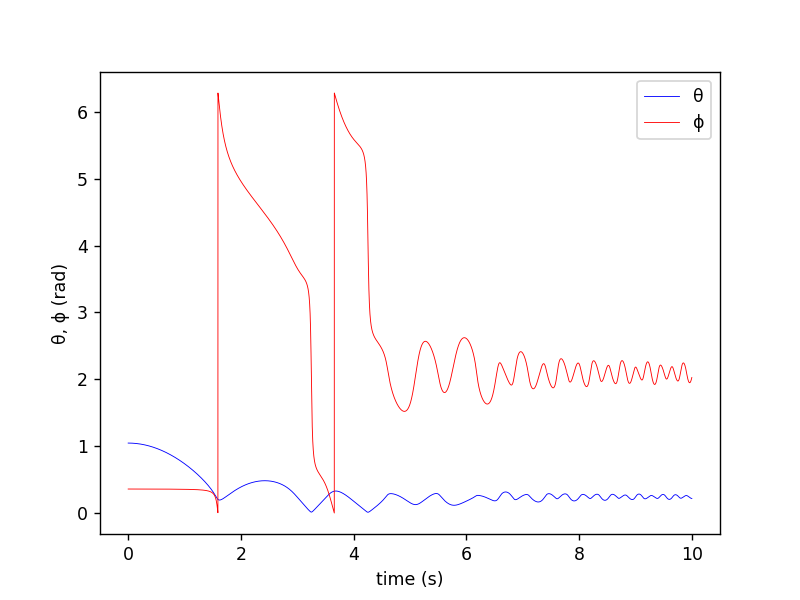

Wall time: 6.09 s


In [11]:
%%time
N = 3
L = 20
R = 5
m = 50e-3
g = 9.81
α = -30 #Recall, a negative number means these will attract rather than repel.
β = 0.001 #0.001 is the default.
θ0 = pi/3
ϕ0 = 0.36
ωθ0 = 0
ωϕ0 = 0
tend = 10
dt = 0.001


#time, thetadata, dthetadata, phidata, dphidata = RunODES(N, L, R, α, θ0, ϕ0, ωθ0, ωϕ0, tend, dt)
time, thetadata, dthetadata, phidata, dphidata = RunODESD(N, L, R, α, β, θ0, ϕ0, ωθ0, ωϕ0, tend, dt)
plt.figure(dpi=100)
plt.plot(time,thetadata, 'b-', linewidth=0.5, label='θ')
plt.plot(time,phidata, 'r-', linewidth=0.5, label='ϕ')
plt.xlabel('time (s)')
plt.ylabel('θ, ϕ (rad)')
plt.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


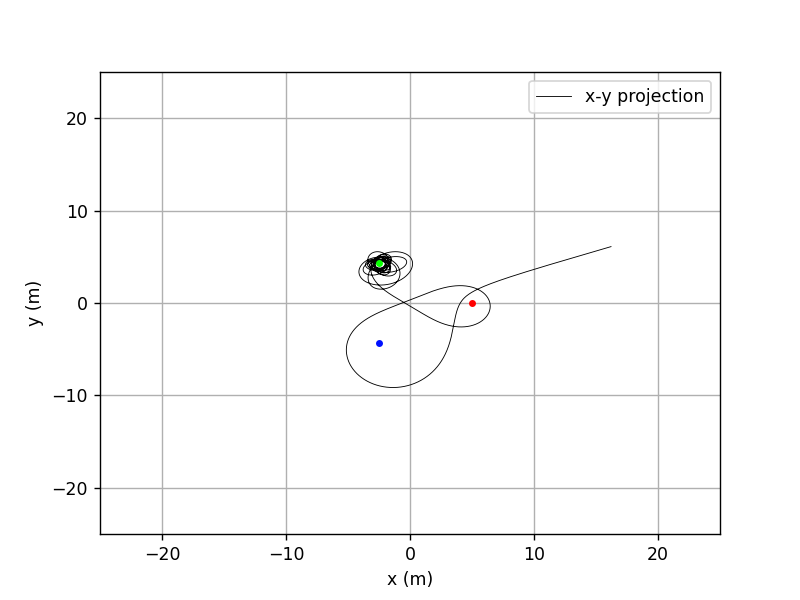

In [12]:
xdata = L*np.cos(phidata)*np.sin(thetadata)
ydata = L*np.sin(phidata)*np.sin(thetadata)
zdata = L*np.cos(thetadata)


plt.figure(dpi=100)
plt.plot(xdata, ydata, 'k-', linewidth=0.5, label='x-y projection')
plt.grid()
Atplotxy(xi, yi)


plt.xlim(-1.25*L,1.25*L)
plt.ylim(-1.25*L,1.25*L)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


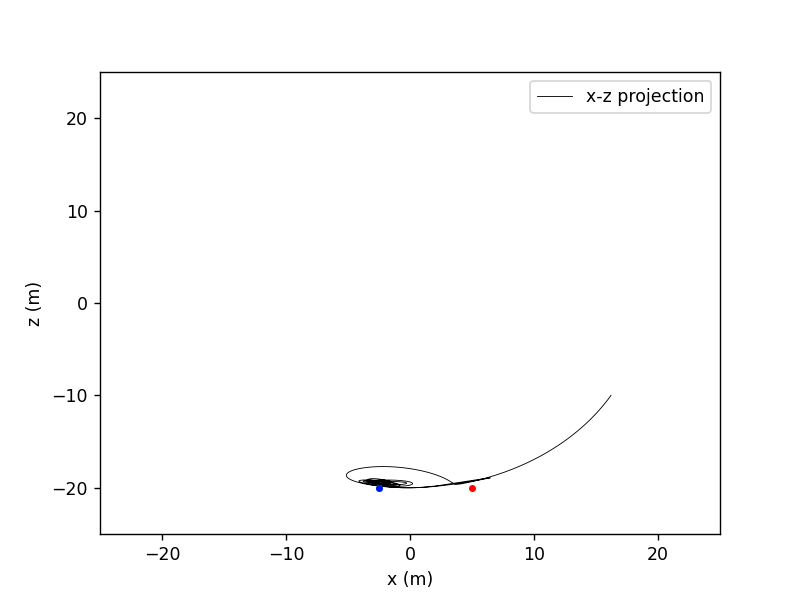

In [13]:
zat = -zi
zdat = -zdata
plt.figure(dpi=100)
plt.plot(xdata, zdat, 'k-', linewidth=0.5, label='x-z projection')
Atplotxz(xi, zi)


plt.xlim(-1.25*L,1.25*L)
plt.ylim(-1.25*L,1.25*L)
plt.xlabel('x (m)')
plt.ylabel('z (m)')
plt.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


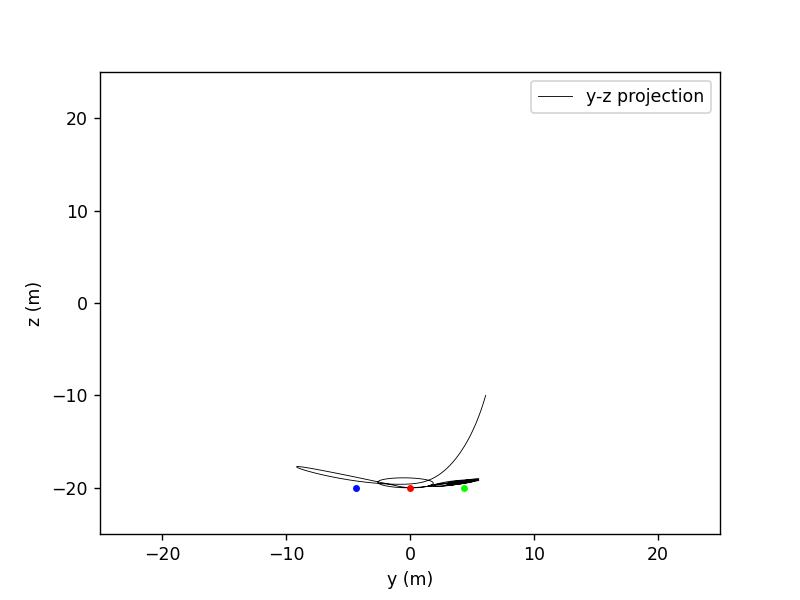

In [14]:
plt.figure(dpi=100)
plt.plot(ydata, zdat, color='k', linestyle='-', linewidth=0.5, label='y-z projection')
Atplotxz(yi, zi)


plt.xlim(-1.25*L,1.25*L)
plt.ylim(-1.25*L,1.25*L)
plt.xlabel('y (m)')
plt.ylabel('z (m)')
plt.legend(loc='best')
plt.show()

In [15]:
xdata = L*np.cos(phidata)*np.sin(thetadata)
ydata = L*np.sin(phidata)*np.sin(thetadata)

filename = 'xy_trajectory_'+str(N)+'_'+str(L)+'_'+str(R)+'_'+str(m)+'_'+str(g)+'_'+str(α)+'_'+str(β)+'_'+str(θ0)+'_'+str(ϕ0)+'_'+str(ωθ0)+'_'+str(ωϕ0)+'_'+str(tend)+'_'+str(dt)+'.mp4'
animxy(filename, 50)

100%|███████████████████████████████████████████████████████████████████████████| 10001/10001 [00:26<00:00, 380.43it/s]


In [16]:
zdata = -L*np.cos(thetadata)
zat = -zi
filename = 'xz_trajectory_'+str(N)+'_'+str(L)+'_'+str(R)+'_'+str(m)+'_'+str(g)+'_'+str(α)+'_'+str(β)+'_'+str(θ0)+'_'+str(ϕ0)+'_'+str(ωθ0)+'_'+str(ωϕ0)+'_'+str(tend)+'_'+str(dt)+'.mp4'
animxz(filename, 50)

100%|███████████████████████████████████████████████████████████████████████████| 10001/10001 [00:26<00:00, 372.98it/s]


In [17]:
filename = 'yz_trajectory_'+str(N)+'_'+str(L)+'_'+str(R)+'_'+str(m)+'_'+str(g)+'_'+str(α)+'_'+str(β)+'_'+str(θ0)+'_'+str(ϕ0)+'_'+str(ωθ0)+'_'+str(ωϕ0)+'_'+str(tend)+'_'+str(dt)+'.mp4'
animyz(filename, 50)

100%|███████████████████████████████████████████████████████████████████████████| 10001/10001 [00:26<00:00, 380.72it/s]


In [214]:
%%time
determiner(ϕ0, θ0, ωϕ0, ωθ0, 10)

Wall time: 3.04 s


0

In [247]:
#Note, the time (in seconds) it takes for resultmap to run is T(n) = 6.11279 n^2.
#This is assuming that:
# N = 3
# L = 20
# R = 5
# m = 50e-3
# g = 9.81
# α = -20 #Recall, a negative number means these will attract rather than repel.
# β = 0.002 #0.001 is the default.
# ωθ0 = 0
# ωϕ0 = 0
# tend = 10
# dt = 0.001
#are our conditions.

def timencfg1(n):
    return 6.11279*(n**2)

In [309]:
timencfg1(100)/3600

16.979972222222223

In [325]:
#Configuration 2 has conditions:
# N = 3
# L = 20
# R = 5
# m = 50e-3
# g = 9.81
# α = -30 #Recall, a negative number means these will attract rather than repel.
# β = 0.003 #0.001 is the default.
# ωθ0 = 0
# ωϕ0 = 0
# tend = 5
# dt = 0.001
#Let's see how long it takes for the program to run.

def timencfg2(n):
    return 3.09851*(n**2)

In [326]:
timencfg2(113)/3600

10.990242830555557

In [366]:
#Configuration 3 has conditions:
# N = 3
# L = 20
# R = 5
# m = 50e-3
# g = 9.81
# α = -30 #Recall, a negative number means these will attract rather than repel.
# β = 0.001 #0.001 is the default.
# ωθ0 = 0
# ωϕ0 = 0
# tend = 10
# dt = 0.001
#Let's see how long it takes for the program to run.

def timencfg3(n):
    return 6.34145*(n**2)

In [367]:
timencfg3(92)/3600

14.909453555555556

The cells below run code for generating a color map that describes what initial starting positions (in theta and phi) will end at a certain attractor. If an initial position either generates NaN when solving the ODEs or doesn't get within a certain radius of an attractor, then the program assigns the value np.nan to the final position to essentially mask those values with a white color.
This, without the aid of numba, takes a long time to generate a decently-resolved image, so please refer to the images already included.

In [368]:
N = 3
L = 20
R = 5
m = 50e-3
g = 9.81
α = -30 #Recall, a negative number means these will attract rather than repel.
β = 0.001 #0.001 is the default.
ωθ0 = 0
ωϕ0 = 0
tend = 10
dt = 0.001

In [ ]:
n = 5
θ0p = np.linspace(0.01,pi/2, n)
ϕ0p = np.linspace(0,2*pi, n)
θ0s, ϕ0s = np.meshgrid(θ0a, ϕ0a)

In [ ]:
%%time
res = ResultMap(ϕ0s, θ0s, ωϕ0, ωθ0, 10)

In [ ]:
#you can check res by simply printing the values in that array to get a sense of what it looks like before plotting.

<IPython.core.display.Javascript object>


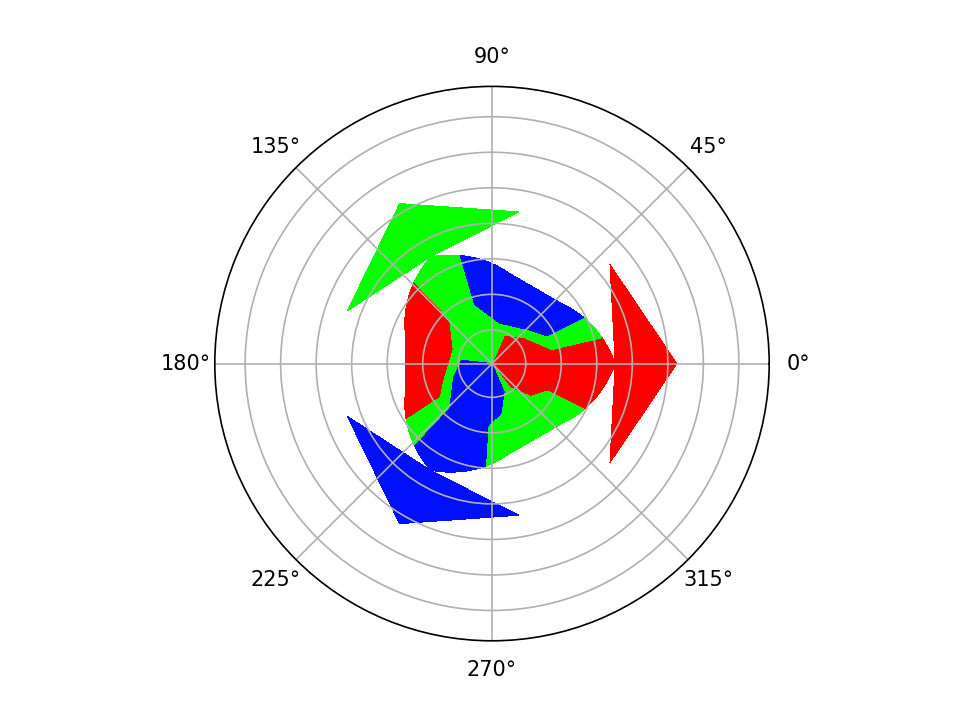

In [371]:
fig, ax = plt.subplots(dpi=120, subplot_kw=dict(projection='polar'))
ax.contourf(ϕ0s, θ0s, res,100,cmap=colormap)
ax.yaxis.set_ticklabels([]);

The code below generates a much higher resolution map of the above system (configuration 3). This took nearly 15 hours to run on my system, but those times may vary depending on your system.

In [369]:
# #This cell is for iterating through theta-0 and phi-0
n = 92
θ0a = np.linspace(0.01,pi/2, n)
ϕ0a = np.linspace(0,2*pi, n)

θ0s_15hr_92it, ϕ0s_15hr_92it = np.meshgrid(θ0a, ϕ0a)

In [331]:
colormap = coloring(N)

In [372]:
%%time
#res = ResultMap(ϕ0s, θ0s, ωϕ0, ωθ0, 10)
res_15hr_92it = ResultMap(ϕ0s_15hr_92it, θ0s_15hr_92it, ωϕ0, ωθ0, 10)

<ipython-input-4-25a4863909e0>:111: RuntimeWarning: overflow encountered in double_scalars
  dωθdt = (ωϕ**2)*np.sin(θ)*np.cos(θ) - (g/L)*np.sin(θ) + (1/(m * L**2))*tsum(θ,ϕ) - β*(L**2)*np.sqrt(ωθ**2 + (ωϕ**2)*(np.sin(θ)**2))*ωθ
<ipython-input-4-25a4863909e0>:111: RuntimeWarning: invalid value encountered in double_scalars
  dωθdt = (ωϕ**2)*np.sin(θ)*np.cos(θ) - (g/L)*np.sin(θ) + (1/(m * L**2))*tsum(θ,ϕ) - β*(L**2)*np.sqrt(ωθ**2 + (ωϕ**2)*(np.sin(θ)**2))*ωθ
<ipython-input-4-25a4863909e0>:112: RuntimeWarning: overflow encountered in double_scalars
  dωϕdt = -2*ωϕ*ωθ*(np.cos(θ)/np.sin(θ)) + (1/(m * L**2 * np.sin(θ)**2))*psum(θ,ϕ) - β*(L**2)*np.sqrt(ωθ**2 + (ωϕ**2)*(np.sin(θ)**2))*ωϕ*np.sin(θ)
<ipython-input-4-25a4863909e0>:112: RuntimeWarning: invalid value encountered in double_scalars
  dωϕdt = -2*ωϕ*ωθ*(np.cos(θ)/np.sin(θ)) + (1/(m * L**2 * np.sin(θ)**2))*psum(θ,ϕ) - β*(L**2)*np.sqrt(ωθ**2 + (ωϕ**2)*(np.sin(θ)**2))*ωϕ*np.sin(θ)
C:\Users\astro\PHY2200_computational\semester_project-dves

Wall time: 14h 13min 18s


<IPython.core.display.Javascript object>


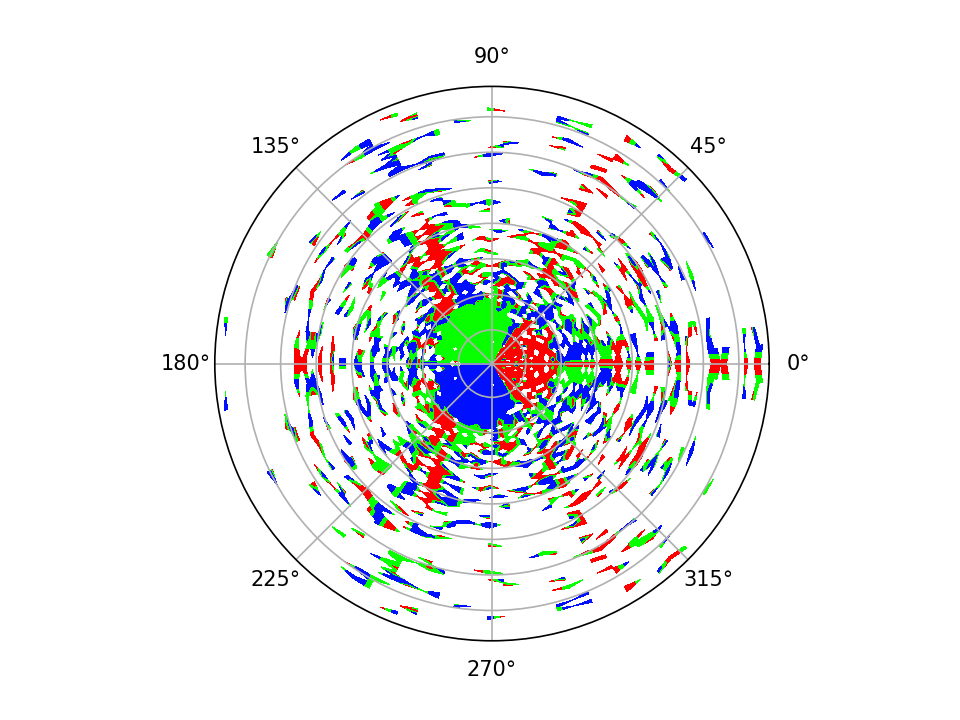

In [374]:
# fig_15hr_92it, ax15hr92it = plt.subplots(dpi=120, subplot_kw=dict(projection='polar'))
# ax15hr92it.contourf(ϕ0s_15hr_92it, θ0s_15hr_92it, res_15hr_92it,100,cmap=colormap)
# ax15hr92it.yaxis.set_ticklabels([]);
# plt.savefig('15hr_92n_phi0to2pi_theta0_01tohalf_pi.png', dpi=500, bbox_inches='tight')

In [330]:
# %%time
# # #This cell is for iterating through theta-0 and phi-0
# n = 113
# θ0a_11hrs_113n = np.linspace(0.01,pi/2, n)
# ϕ0a_11hrs_113n = np.linspace(0,2*pi, n)

# θ0s_113n, ϕ0s_113n = np.meshgrid(θ0a_11hrs_113n, ϕ0a_11hrs_113n)
# res_113n = ResultMap(ϕ0s_113n, θ0s_113n, ωϕ0, ωθ0, 10)

<ipython-input-4-25a4863909e0>:111: RuntimeWarning: overflow encountered in double_scalars
  dωθdt = (ωϕ**2)*np.sin(θ)*np.cos(θ) - (g/L)*np.sin(θ) + (1/(m * L**2))*tsum(θ,ϕ) - β*(L**2)*np.sqrt(ωθ**2 + (ωϕ**2)*(np.sin(θ)**2))*ωθ
<ipython-input-4-25a4863909e0>:112: RuntimeWarning: overflow encountered in double_scalars
  dωϕdt = -2*ωϕ*ωθ*(np.cos(θ)/np.sin(θ)) + (1/(m * L**2 * np.sin(θ)**2))*psum(θ,ϕ) - β*(L**2)*np.sqrt(ωθ**2 + (ωϕ**2)*(np.sin(θ)**2))*ωϕ*np.sin(θ)
<ipython-input-4-25a4863909e0>:112: RuntimeWarning: invalid value encountered in double_scalars
  dωϕdt = -2*ωϕ*ωθ*(np.cos(θ)/np.sin(θ)) + (1/(m * L**2 * np.sin(θ)**2))*psum(θ,ϕ) - β*(L**2)*np.sqrt(ωθ**2 + (ωϕ**2)*(np.sin(θ)**2))*ωϕ*np.sin(θ)
<ipython-input-4-25a4863909e0>:111: RuntimeWarning: invalid value encountered in sin
  dωθdt = (ωϕ**2)*np.sin(θ)*np.cos(θ) - (g/L)*np.sin(θ) + (1/(m * L**2))*tsum(θ,ϕ) - β*(L**2)*np.sqrt(ωθ**2 + (ωϕ**2)*(np.sin(θ)**2))*ωθ
<ipython-input-4-25a4863909e0>:111: RuntimeWarning: invalid value enc

Wall time: 10h 14min 15s


In [361]:
# colormap = coloring(N)
# fig11hr, ax11hr = plt.subplots(dpi=120, subplot_kw=dict(projection='polar'))
# ax11hr.contourf(ϕ0s_113n, θ0s_113n, res_113n,100,cmap=colormap)
# ax11hr.yaxis.set_ticklabels([]);
# #plt.savefig('113n_phi0to2pi_theta0_01tohalf_pi.png', dpi=500, bbox_inches='tight')

In [337]:
# rescfg1_n70 #= res #I only ran this cell to save the past 8h of my computation for later.
# θ0acfg1_n70 = np.linspace(0.1,pi/2,70)
# ϕ0acfg1_n70 = np.linspace(0, 2*pi, 70)
# θ0scfg1_n70 , ϕ0scfg1_n70 = np.meshgrid(θ0acfg1_n70, ϕ0acfg1_n70)
# figcfg1_n70, axcfg1_n70 = plt.subplots(dpi=120, subplot_kw=dict(projection='polar'))
# axcfg1_n70.contourf(ϕ0scfg1_n70, θ0scfg1_n70, rescfg1_n70,100,cmap=colormap)
# axcfg1_n70.yaxis.set_ticklabels([]);
# #plt.savefig('n70_phi_from_0to2pi_theta_from_0.1_0.5pi.png', dpi=500, bbox_inches='tight')

In [338]:
# fig2 = plt.figure(dpi=120)
# ax2 = fig2.add_subplot(projection='polar')
# c = ax2.scatter(ϕ0s, θ0s, c=res, cmap=colormap, marker='.')
# ax2.yaxis.set_ticklabels([]);
# #ax2.yaxis.grid(True)